# 2018-12-23 Four Filter Analysis (With Rotation)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from imaka.analysis import moffat as m

stats_dir = '//g/lu/data/imaka/onaga/20181223/sta/reduce/stats/'

dat_o_B = m.combine_table(stats_dir + 'stats_open_B.fits')
dat_o_V = m.combine_table(stats_dir + 'stats_open_V.fits')
dat_o_R = m.combine_table(stats_dir + 'stats_open_R.fits')
dat_o_I = m.combine_table(stats_dir + 'stats_open_I.fits')

dat_c_B = m.combine_table(stats_dir + 'stats_closed_B.fits')
dat_c_V = m.combine_table(stats_dir + 'stats_closed_V.fits')
dat_c_R = m.combine_table(stats_dir + 'stats_closed_R.fits')
dat_c_I = m.combine_table(stats_dir + 'stats_closed_I.fits')

dat_o = [dat_o_B, dat_o_V, dat_o_R, dat_o_I]
dat_c = [dat_c_B, dat_c_V, dat_c_R, dat_c_I]
wvls = [445, 551, 658, 806]

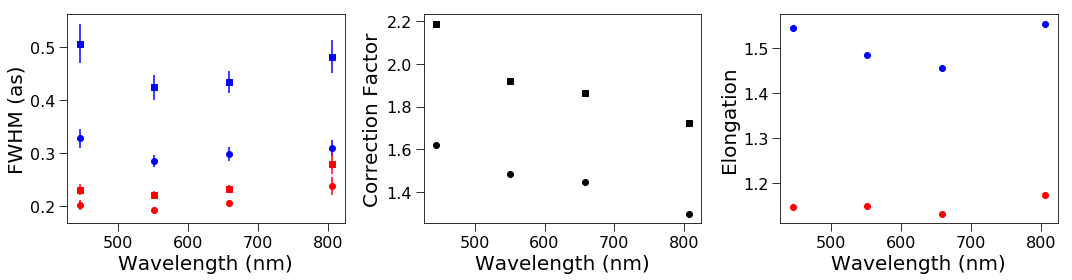

In [12]:
plt.figure(figsize=(15,4))

for ii in range(4):
    FWHM_min_o = np.mean(dat_o[ii]['FWHM_min'])
    FWHM_min_e_o = np.std(dat_o[ii]['FWHM_min']) / np.sqrt(len(dat_o[ii]))
    FWHM_maj_o = np.mean(dat_o[ii]['FWHM_maj']) 
    FWHM_maj_e_o = np.std(dat_o[ii]['FWHM_maj']) / np.sqrt(len(dat_o[ii]))
    
    FWHM_min_c = np.mean(dat_c[ii]['FWHM_min']) 
    FWHM_min_e_c = np.std(dat_c[ii]['FWHM_min']) / np.sqrt(len(dat_c[ii]))
    FWHM_maj_c = np.mean(dat_c[ii]['FWHM_maj'])
    FWHM_maj_e_c = np.std(dat_c[ii]['FWHM_maj']) / np.sqrt(len(dat_c[ii]))
    
    FWHM_min_corr = FWHM_min_o / FWHM_min_c
    FWHM_maj_corr = FWHM_maj_o / FWHM_maj_c
    
    elon_o = FWHM_maj_o / FWHM_min_o
    elon_c = FWHM_maj_c / FWHM_min_c
    
    plt.subplot(131)
    plt.errorbar(wvls[ii], FWHM_min_o, yerr=FWHM_min_e_o, fmt='bo')
    plt.errorbar(wvls[ii], FWHM_maj_o, yerr=FWHM_maj_e_o, fmt='bs')
    plt.errorbar(wvls[ii], FWHM_min_c, yerr=FWHM_min_e_c, fmt='ro')
    plt.errorbar(wvls[ii], FWHM_maj_c, yerr=FWHM_maj_e_c, fmt='rs')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('FWHM (as)')
    
    plt.subplot(132)
    plt.plot(wvls[ii], FWHM_min_corr, 'ko')
    plt.plot(wvls[ii], FWHM_maj_corr, 'ks')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Correction Factor')
    
    plt.subplot(133)
    plt.plot(wvls[ii], elon_o, 'bo')
    plt.plot(wvls[ii], elon_c, 'ro')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Elongation')

plt.tight_layout()

# Blue - open loop; Red - closed loop (first and third plot)
# Circles - Minor FWHM; Squares - Major FWHM (first and second plot)